In [ ]:
# %load ./eval.py
import numpy as np
from PIL import Image

import caffe

# load image, switch to BGR, subtract mean, and make dims C x H x W for Caffe
im = Image.open('pascal/VOC2010/JPEGImages/2007_000129.jpg')
in_ = np.array(im, dtype=np.float32)
in_ = in_[:,:,::-1]
in_ -= np.array((104.00698793,116.66876762,122.67891434))
in_ = in_.transpose((2,0,1))

# load net
net = caffe.Net('deploy.prototxt', 'fcn-32s-pascalcontext.caffemodel', caffe.TEST)
# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_
# run net and take argmax for prediction
net.forward()
out = net.blobs['score'].data[0].argmax(axis=0)

In [8]:
from __future__ import division
import sys
caffe_root = '../..'
sys.path.insert(0,caffe_root+'/python')
import caffe
import numpy as np
import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
im = np.array(Image.open(caffe_root+'/examples/images/cat.jpg'))
caffe.set_mode_gpu()
caffe.set_device(4)
net = caffe.Net('./deploy.prototxt','./fcn-32s-pascalcontext.caffemodel',caffe.TEST)

In [14]:
in_ = np.array(im, dtype=np.float32)
in_ = in_[:,:,::-1]
in_ -= np.array((104.00698793,116.66876762,122.67891434))
in_ = in_.transpose((2,0,1))
net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_
net.forward()
out = net.blobs['score'].data[0]

(60, 360, 480)


In [15]:
print out.shape
print in_.shape

(60, 360, 480)
(3, 360, 480)


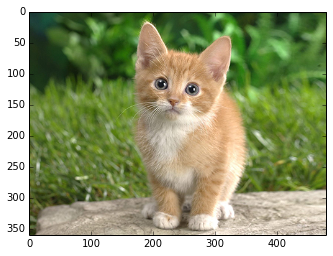

In [17]:
plt.imshow(im)

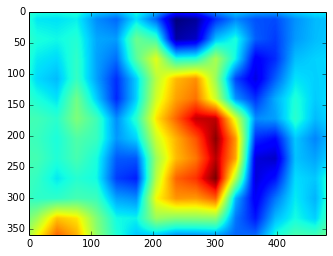

In [26]:
plt.imshow(out[10])